In [1]:
# From the Codecademy online course
# March 23rd
# objective:
# scrape chocolate data & push to pandas df
# extract insights/relationships about cacao/chocolate
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# get URL & make get request
base_url = 'https://s3.amazonaws.com/codecademy-content/courses/beautifulsoup/cacao/index.html'
resp = requests.get(base_url)

# parse & extract table
soup = BeautifulSoup(resp.content, 'html.parser')
# cacao_table = soup.find('table', { 'id': 'cacaoTable' })

In [3]:
# Get ratings w/ HTML:
# td class="Rating"
ratings = []
ratings_soup = soup.find_all('td', { 'class': 'Rating' })

i = 0
for r in ratings_soup:
    i += 1
    if i == 1:
        continue
    datum = float(r.get_text())
    ratings.append(datum)

In [4]:
# Get companies
company_names = []
company_names_soup = soup.select('.Company')

# counter & loop
i = 0
for c in company_names_soup:
    i += 1
    # skip if header
    if i == 1: continue
    company_names.append(c.get_text())

In [5]:
# Get percentages
cocao_percents = []
cocao_percentage_soup = soup.select('.CocoaPercent')

for td in cocao_percentage_soup[1:]:
    percent = float(td.get_text().strip('%'))
    cocao_percents.append(percent)

In [6]:
# make DF
cacao_compare_template = {
    'Company': company_names,
    'Rating': ratings,
    'CocoaPercentage': cocao_percents
}

cacao_df = pd.DataFrame.from_dict(cacao_compare_template)
print(cacao_df.head())

    Company  Rating  CocoaPercentage
0  A. Morin    3.75             63.0
1  A. Morin    2.75             70.0
2  A. Morin    3.00             70.0
3  A. Morin    3.50             70.0
4  A. Morin    3.50             70.0


In [7]:
# get the top 10 producers by rating
mean_ratings = cacao_df.groupby('Company').Rating
ten_best_samples = mean_ratings.nlargest(10)
print(ten_best_samples)

Company                     
A. Morin                9       4.00
                        17      4.00
                        20      4.00
                        0       3.75
                        8       3.75
                                ... 
twenty-four blackbirds  1671    3.50
                        1672    3.25
                        1669    2.75
                        1674    2.75
                        1673    2.50
Name: Rating, Length: 1548, dtype: float64


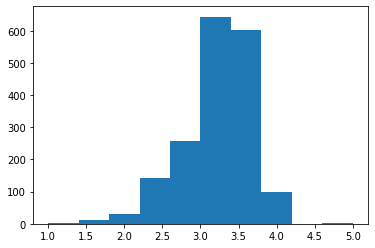

In [8]:
# plot histogram
plt.hist(ratings)
plt.show()

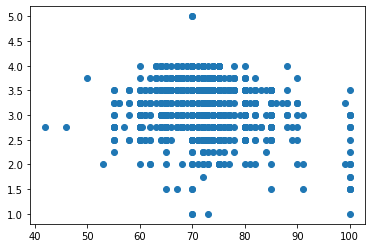

In [9]:
# make scatter plot & clear b/c of histogram
plt.clf()
plt.scatter(cacao_df.CocoaPercentage, cacao_df.Rating)
plt.show()

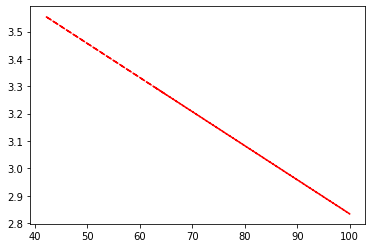

In [10]:
# find potential correlation
z = np.polyfit(cacao_df.CocoaPercentage, cacao_df.Rating, 1)
line_function = np.poly1d(z)
plt.plot(cacao_df.CocoaPercentage, line_function(cacao_df.CocoaPercentage), "r--")